# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [108]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('fivethirtyeight')

Then, read in your dataset:

In [109]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


## Questions

> ### Question 1.  How many observations are in our dataset?

In [111]:
len(df)

400

Answer: There are 400 observations on the dataset

> ### Question 2.  Create a summary table.

In [112]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [113]:
print "'GRE' mean value = %f and STD = %f" % (df['gre'].mean(), df['gre'].std())
print "'GPA' mean value = %f and STD = %f" % (df['gpa'].mean(), df['gpa'].std())

'GRE' mean value = 588.040201 and STD = 115.628513
'GPA' mean value = 3.390930 and STD = 0.380630


Answer: GRE has a larger varience because GRE population STD is large compared to the mean (115.7 vs 220) while 'GPA's population STD is small compared to the mean that indicates that GPA values are concentrated closer to GPA population mean. On the other hand GRE values are more disperse.

> ### Question 4.  Drop data points with missing data.

In [114]:
df.dropna(inplace=True)

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


In [116]:
df[(df['gre'].isnull()==True) | (df['gpa'].isnull()==True) | (df['prestige'].isnull()==True)]

,admit,gre,gpa,prestige


Answer: df.info() fucntion will be able to show that the number of non-nulls across all variables is the same. 

I double checked using a call of a dataframe where one of the variables is null -> it didn't return any rows

> ### Question 6.  Create boxplots for `gre` and `gpa`.

''

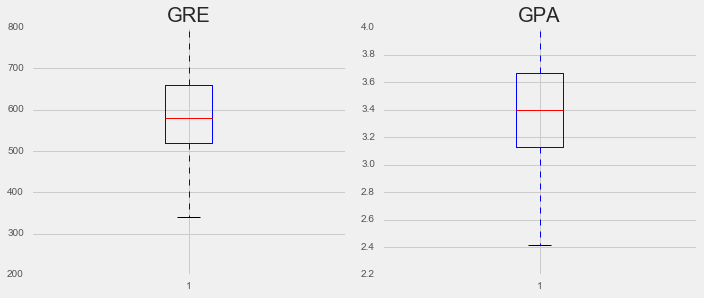

In [123]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.boxplot(df['gre'],sym='+')
plt.title('GRE')

plt.subplot(2,2,2)
plt.boxplot(df['gpa'])
plt.title('GPA')

plt.tight_layout()
;

> ### Question 7.  What do boxplots show?

Answer: Boxplots summarize the distribution of the data. Half of the data falls within the box, the lines coming outside of the box show the variability of the data outside the middle half of the data. 

This boxplot shows that GPA variables that fall outside of the middle half are more dispersed than GRE variables. It also shows that there are no outliers in both GRE and GPA populations since no values that fell outside of the whisker limit. 

> ### Question 8.  Plot the distribution of each variable.

''

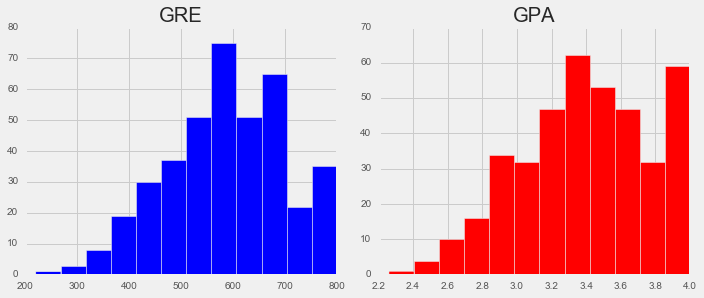

In [124]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.hist(df['gre'],bins=12,color='blue')
plt.title('GRE')

plt.subplot(2,2,2)
plt.hist(df['gpa'],bins=12,color='red')
plt.title('GPA')

plt.tight_layout()
;

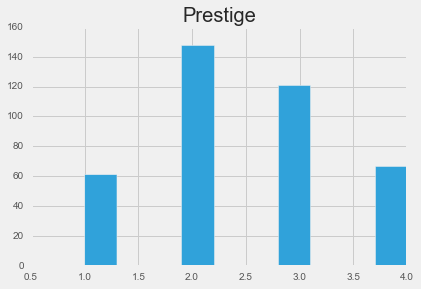

In [126]:
plt.figure()

plt.hist(df['prestige'])
plt.title('Prestige')


> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [127]:
# TODO

Answer: If our model had an assumption of a normal distribution we would meet that requirement, because the data is concentrated around the mean. The distribution of GRE and GPA does not need any corrections, it has no outliers. 

> ### Question 10.  Create a correlation matrix for the dataset

In [128]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: GPA and GRE are potentially collinear since they have they highest correlation coefficient (0.38) among the three combinations of variables. However, 0.38 coefficient is considereate moderate. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: 
1. Check variable types for prestige of undegraduate school 
1. Look at the data distribution
1. Identify if there are outliers in the data. If yes, remove outliers
1. Check the variable for NULL values. Remove records with NULL values
1. Run correlation analysis to identify the strength of the linear association between the two variables

> ### Question 13.  What is your hypothesis?

Answer: Applicants who graduted from schoos within higher prestige tier are more likely to be accepted to UCLA.